<a href="https://colab.research.google.com/github/jwiggerthale/HiL-Machine-Learnig/blob/main/Grad_cam_heatmap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install ultralytics==8.3.155
!pip install ultralytics-thop==2.0.14

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 13.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 57.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 35.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 15.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 60.4 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling 

In [ ]:
# !pip install fiftyone

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 55.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.3/112.3 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.5/51.5 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.4/112.4 kB 8.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.8/74.8 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 54.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.3/306.3 kB 21.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 943.0/943.0 kB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.7/43.7 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 10.3 MB/s eta 0:

In [ ]:
import kagglehub
from glob import glob
import os
import yaml
from google.colab import drive
import shutil
import random
from pathlib import Path
import torch
from ultralytics import YOLO
# import fiftyone as fo

In [ ]:
dataset_path = kagglehub.dataset_download("zhangyunsheng/defects-class-and-location")
label_files = glob(os.path.join(dataset_path, '**/*.xml'), recursive=True)
image_files = glob(os.path.join(dataset_path, '**/images/*/*.jpg'), recursive=True)  # Adjusted pattern
label_files[:5], image_files[:5]

100%|██████████| 923M/923M [00:31<00:00, 30.8MB/s]

Extracting files...


(['/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-location/versions/1/label/label/img_08_4406743300_00425.xml',
  '/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-location/versions/1/label/label/img_08_425505100_00053.xml',
  '/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-location/versions/1/label/label/img_03_436152900_00582.xml',
  '/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-location/versions/1/label/label/img_02_4406645900_00346.xml',
  '/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-location/versions/1/label/label/img_01_425005700_00322.xml'],
 ['/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-location/versions/1/images/images/welding_line/img_03_3402616900_00001.jpg',
  '/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-location/versions/1/images/images/welding_line/img_02_436164300_01201.jpg',
  '/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-loc

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
class_map = {
    'crease': 0, 'crescent_gap': 1, 'inclusion': 2,
    'oil_spot': 3, 'punching_hole': 4, 'rolled_pit': 5,
    'silk_spot': 6, 'waist_folding': 7, 'water_spot': 8,
    'welding_line': 9
}

In [ ]:
!rm -rf /content/datanew1 # deleting the folder with same name already existing

In [ ]:
# Set your  directories
#imag dir should match the from above image directories
images_dir = Path('/root/.cache/kagglehub/datasets/zhangyunsheng/defects-class-and-location/versions/1/images/images')
#labels in yolo format are uploade from google drive with file names ims
labels_dir = Path('/content/drive/MyDrive/ims')

# Set output directories
output_dir = Path('datanew1')
train_dir = output_dir / 'train'
val_dir = output_dir / 'val'

#spliting data into train and val
# Split ratio
split_ratio = 0.9

# Gather label files
label_files = sorted([f for f in labels_dir.iterdir() if f.is_file()])

# Shuffle and split
random.shuffle(label_files)
split_idx = int(len(label_files) * split_ratio)
train_labels = label_files[:split_idx]
val_labels = label_files[split_idx:]

def copy_data(label_list, split_folder):
    (split_folder / 'labels').mkdir(parents=True, exist_ok=True)
    (split_folder / 'images').mkdir(parents=True, exist_ok=True)
    for label_path in label_list:
        shutil.copy(label_path, split_folder / 'labels' / label_path.name)
        base_name = label_path.stem
        found = False
        for class_folder in images_dir.iterdir():
            if class_folder.is_dir():
                image_path = class_folder / f"{base_name}.jpg"
                if image_path.exists():
                    shutil.copy(image_path, split_folder / 'images' / image_path.name)
                    found = True
                    break
        if not found:
            print(f"Image for label {label_path.name} not found.")

copy_data(train_labels, train_dir)
copy_data(val_labels, val_dir)

In [ ]:
!git clone https://github.com/rigvedrs/YOLO-V11-CAM.git

Cloning into 'YOLO-V11-CAM'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (59/59), done.
remote: Compressing objects: 100% (46/46), done.
remote: Total 158 (delta 33), reused 21 (delta 11), pack-reused 99 (from 2)
Receiving objects: 100% (158/158), 52.67 MiB | 20.57 MiB/s, done.
Resolving deltas: 100% (64/64), done.


In [ ]:
!pip install ttach

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [ ]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')  # Suppress Matplotlib warnings

In [ ]:
plt.rcParams["figure.figsize"] = [3.0, 3.0]

In [ ]:
import sys
sys.path.append("/content/YOLO-V11-CAM")  # Add cloned repo to Python path

In [ ]:
from yolo_cam.eigen_cam import EigenCAM
from yolo_cam.utils.image import show_cam_on_image, scale_cam_image

In [ ]:
# import numpy as np
# import torch

# def get_2d_projection(activation_batch):
#     # TBD: use pytorch batch svd implementation
#     if isinstance(activation_batch, torch.Tensor):  # Add conversion check
#         activation_batch = activation_batch.detach().cpu().numpy() # Convert to numpy if it's a tensor
#     activation_batch[np.isnan(activation_batch)] = 0
#     projections = []
#     for activations in activation_batch:
#         reshaped_activations = (activations).reshape(
#             activations.shape[0], -1).transpose()
#         # Centering before the SVD seems to be important here,
#         # Otherwise the image returned is negative
#         reshaped_activations = reshaped_activations - \
#             reshaped_activations.mean(axis=0)
#         U, S, VT = np.linalg.svd(reshaped_activations, full_matrices=True)
#         projection = reshaped_activations @ VT[0, :]
#         projection = projection.reshape(activations.shape[1:])
#         projections.append(projection)
#     return np.float32(projections)

In [ ]:
img = cv2.imread('/content/datanew1/train/images/img_01_3436789500_00004.jpg')
img = cv2.resize(img, (640, 640))
rgb_img = img.copy()
img = np.float32(img) / 255

In [ ]:
# upload best.pt from runs/detect/train4/weights/
model = YOLO('/content/best.pt')
model = model.cpu()

In [ ]:
target_layers =[model.model.model[-2]]


0: 640x640 1 crease, 555.2ms
Speed: 10.9ms preprocess, 555.2ms inference, 34.9ms postprocess per image at shape (1, 3, 640, 640)


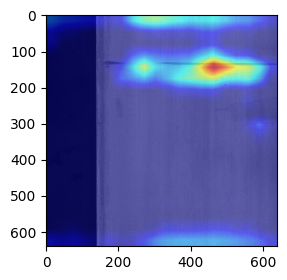

In [ ]:
cam = EigenCAM(model, target_layers,task='od')
grayscale_cam = cam(rgb_img)[0, :, :]
cam_image = show_cam_on_image(img, grayscale_cam, use_rgb=True)
plt.imshow(cam_image)
plt.show()

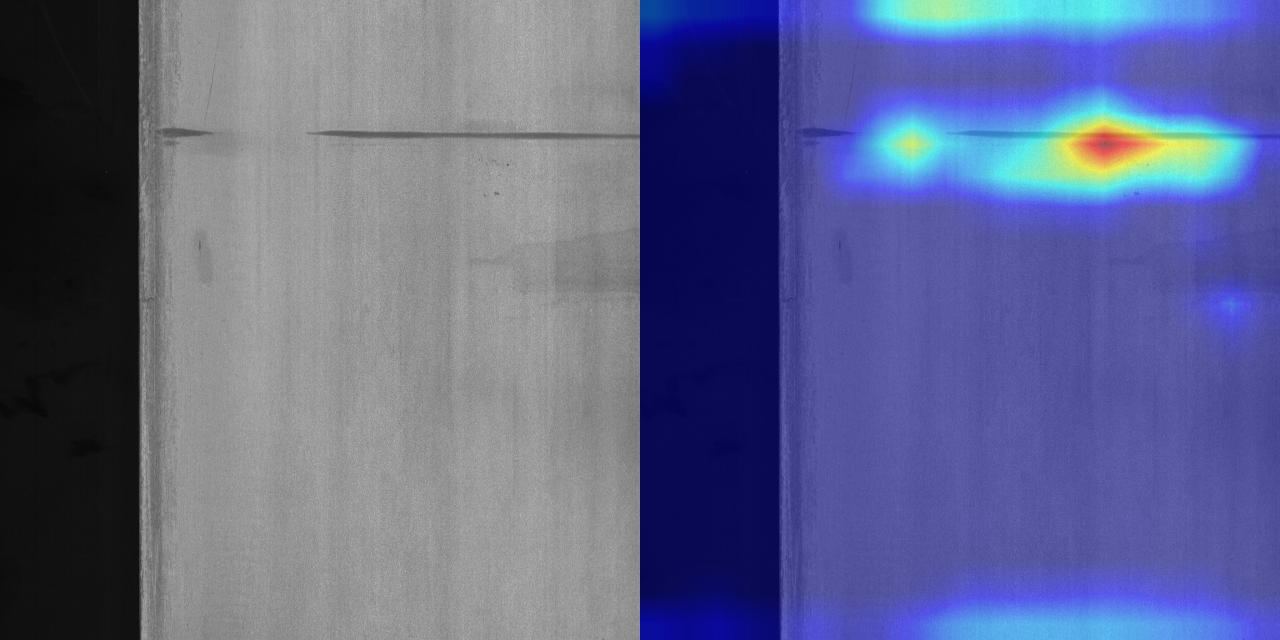

In [ ]:
im = cv2.cvtColor(rgb_img, cv2.COLOR_RGB2BGR)
Image.fromarray(np.hstack((im, cam_image)))